# Práctica 2
Seminario de Sistemas 2

Sección A

Nombre del Alumno: Rodrigo Alejandro Hernández de León

Carné: 201900042

## Parte 1
### Extracción de datos
Importamos pandas para poder trabajar con los datos y cargamos el archivo de datos `datos.csv` en un DataFrame de pandas.

In [1]:
import pandas as pd

# Cargamos la data
data = pd.read_csv('datos.csv')

# Eliminando duplicados:
data = data.drop_duplicates()
data

,Course Title,Rating,Level,Duration,Schedule,Review,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url
0,Fashion as Design,4.8,Beginner level,20 hours (approximately),Flexible schedule,"2,813 reviews",NaN,"['Art History', 'Art', 'History', 'Creativity']","['Introduction', 'Heroes', 'Silhouettes', 'Cou...","['Anna Burckhardt', 'Paola Antonelli', 'Michel...",['The Museum of Modern Art'],Arts and Humanities,https://www.coursera.org/learn/fashion-design
1,Modern American Poetry,4.4,Beginner level,Approx. 34 hours to complete,Flexible schedule,100 reviews,NaN,[],"['Orientation', 'Module 1', 'Module 2', 'Modul...",['Cary Nelson'],['University of Illinois at Urbana-Champaign'],Arts and Humanities,https://www.coursera.org/learn/modern-american...
2,Pixel Art for Video Games,4.5,Beginner level,9 hours (approximately),Flexible schedule,227 reviews,NaN,[],"['Week 1: Introduction to Pixel Art', 'Week 2:...","['Andrew Dennis', 'Ricardo Guimaraes']",['Michigan State University'],Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...
3,Distribución digital de la música independiente,NaN,Beginner level,Approx. 8 hours to complete,Flexible schedule,NaN,NaN,[],"['Semana 1', 'Semana 2', 'Semana 3', 'Semana 4']",['Eduardo de la Vara Brown.'],['SAE Institute México'],Arts and Humanities,https://www.coursera.org/learn/distribucion-di...
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Approx. 11 hours to complete,Flexible schedule,582 reviews,Students will be able to describe the blues as...,"['Music', 'Chord', 'Jazz', 'Jazz Improvisation']","['Blues Progressions – Theory and Practice ', ...",['Dariusz Terefenko'],['University of Rochester'],Arts and Humanities,https://www.coursera.org/learn/the-blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8690,Architecting with Google Kubernetes Engine: Pr...,4.9,Intermediate level,14 hours (approximately),Flexible schedule,30 reviews,NaN,[],"['Introducción al curso', 'Control de acceso y...",['Google Cloud Training'],['Google Cloud'],Social Sciences,https://www.coursera.org/learn/deploying-secur...
8691,Computational Thinking for K-12 Educators: Nes...,NaN,Beginner level,11 hours (approximately),Flexible schedule,NaN,NaN,"['Education', 'want', 'Resource', 'Causality']","['Course Orientation', 'Nested If/Else Part 1'...",['Beth Simon'],['University of California San Diego'],Social Sciences,https://www.coursera.org/learn/block-programmi...
8692,Cómo combinar y analizar datos complejos,NaN,NaN,Approx. 9 hours to complete,Flexible schedule,NaN,NaN,[],"['Estimación básica', 'Modelos', 'Vinculación ...","['Richard Valliant, Ph.D.']","['University of Maryland, College Park']",Social Sciences,https://www.coursera.org/learn/data-collection...
8693,Architecting with Google Kubernetes Engine: Wo...,NaN,Intermediate level,19 hours (approximately),Flexible schedule,NaN,NaN,[],"['Introdução ao curso', 'Operações do Kubernet...",['Google Cloud Training'],['Google Cloud'],Social Sciences,https://www.coursera.org/learn/deploying-workl...


## Parte 2
### Limpieza de datos

Se procede a limpiar los datos, cambiando los valores de las columnas para el análisis y asi tener un mejor manejo de los datos.

#### Limpieza data['Course']

In [2]:
# El course title lo ponemos en mayusculas y eliminamos los espacios en blanco
data['Course Title'] = data['Course Title'].str.upper()
for d in data['Course Title']:
    str(d).strip()


#### Limpieza data['Rating']

In [3]:
# Lo convertimos a numero
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce', downcast='float')
# El rating donde tenga vacios o nulos le ponemos 0
data['Rating'] = data['Rating'].fillna(0)

#### Limpieza data['Level']

In [4]:
# La columna de Level ponemos en mayusculas y eliminamos los espacios en blanco
data['Level'] = data['Level'].str.upper()
for d in data['Level']:
    str(d).strip()

#### Limpieza data['Duration']

In [5]:
# En la columna duración se extraera los numeros de horas por medio de una expresión regular
import re
# funcion para obtener la cantidad de horas
def extraer_duracion_a_horas(cadena):
    patron_numeros = r'\d+'

    numeros = re.findall(patron_numeros, cadena)

    if len(numeros) == 1:
        return int(numeros[0])  
    elif len(numeros) == 2:
        meses = int(numeros[0])
        horas_semana = int(numeros[1])
        semanas_mes = (365.25/7)/12
        return int(meses * 4 * horas_semana)
    else:
        return 0

#Los nulos seran 0
data['Duration'] = data['Duration'].fillna(0)

# Convertimos la columna 'Duration' a cadena de texto
data['Duration'] = data['Duration'].astype(str)

# Aplicamos la función a la columna 'Duration'
data['Duration'] = data['Duration'].apply(extraer_duracion_a_horas)


#### Limpieza data['Schedule']

In [6]:
# Pasamos a mayusculas la columna 'Schedule' y eliminamos los espacios en blanco
data['Schedule'] = data['Schedule'].str.upper()
for d in data['Schedule']:
    str(d).strip()
# Reemplazamos los valores nulos por 'NINGUNO'
data['Schedule'] = data['Schedule'].fillna('NINGUNO')

#### Limpieza data['Review']

In [7]:
# Unicamente se extraeran los numeros y los Nan se reemplazaran por 0
# Primero se borra las comas de los numeros
data['Review'] = data['Review'].str.replace(',', '')

# Se borran las palabras reviews
data['Review'] = data['Review'].str.replace('reviews', '')

# Se convierte a numero
data['Review'] = pd.to_numeric(data['Review'], errors='coerce', downcast='float')

# Se reemplazan los valores nulos por 0
data['Review'] = data['Review'].fillna(0)

# Se convierte a entero
data['Review'] = data['Review'].astype(int)


#### Limpieza data['What you will learn']

In [8]:
# Se borran los espacios en blanco y los valores nulos se reemplazan por 'Nada'
data['What you will learn'] = data['What you will learn'].str.strip()
data['What you will learn'] = data['What you will learn'].fillna('Nada')

#### Limpieza data['Skill gain']

In [9]:
# Convertimos la columna de Skill gain a lista
data['Skill gain'] = data['Skill gain'].apply(lambda x: eval(x))

#### Limpieza data['Modules']

In [10]:
# Convertimos la columna de Modules a lista
data['Modules'] = data['Modules'].apply(lambda x: eval(x))

#### Limpieza data['Instructor']

In [11]:
# Convertimos la columna de Instructor a una lista
data['Instructor'] = data['Instructor'].apply(lambda x: eval(x))

#### Limpieza data['Offered By']

In [12]:
# Convertimos la columna de Offered By a una lista
data['Offered By'] = data['Offered By'].apply(lambda x: eval(x))


#### Limpieza data['Keyword']

In [13]:
# Se borraran los espacios en blanco y se pondran en mayusculas
data['Keyword'] = data['Keyword'].str.upper()
for d in data['Keyword']:
    str(d).strip()

# Se reemplazaran los valores nulos por 'NINGUNO'
data['Keyword'] = data['Keyword'].fillna('NINGUNO')


#### Limpieza data['Course Url']

In [14]:
# Se reemplazaran los valores nulos por 'NINGUNO'
data['Course Url'] = data['Course Url'].fillna('NINGUNO')
# Se borraran los espacios en blanco
for d in data['Course Url']:
    str(d).strip()


## Parte 3
### Cálculos

Se procede a realizar los cálculos solicitados en la práctica.

#### Cálculo del promedio de calificaciones para cada curso

Cálculo del promedio de calificaciones para cada curso en el
conjunto de datos. Para ello, se agrupan los datos por el título del curso y se calcula el promedio de las calificaciones para cada grupo.


In [15]:
# Agrupa los promedios de las calificaciones por curso
promedio_calificaciones = data.groupby('Course Title')['Rating'].mean().reset_index()

# Se cambian los nombres de las columnas
promedio_calificaciones.columns = ['Curso', 'Promedio de calidicaciones']

promedio_calificaciones

,Curso,Promedio de calidicaciones
0,ASSISTING PUBLIC SECTOR DECISION MAKERS WITH ...,4.8
1,ATENCIÓN PREHOSPITALARIA DEL ICTUS AGUDO Y SE...,4.9
2,BUILD A SOCIAL MEDIA PRESENCE FOR YOUR BUSINE...,4.7
3,BUILD SOCIAL AWARENESS CONTENT FOR TWITTER WI...,0.0
4,"COMERCIO, INMIGRACIÓN Y TIPOS DE CAMBIO EN UN...",4.9
...,...,...
6387,"현대 로봇공학, 강좌 2: 로봇 기구학",0.0
6388,"현대 로봇공학, 강좌 3: 로봇 동역학",0.0
6389,"현대 로봇공학, 강좌 4: 로봇 동작 계획 및 제어",0.0
6390,"현대 로봇공학, 강좌 5: 로봇 매니퓰레이션 및 차륜형 이동 로봇",0.0


#### Cálculo de los cursos con mayor rating y menor rating

Cálculo de los cursos con mayor rating y menor rating en el conjunto de datos. Para ello, se ordenan los datos por la calificación y se seleccionan los cursos con la calificación más alta y más baja.

In [16]:
import pandas as pd

# Obtiene los cursos con mayor rating
cursos_rating_5 = data.loc[data['Rating'] == 5.0, ['Course Title', 'Rating']]
# Obtiene los cursos con menor rating
cursos_rating_0 = data.loc[data['Rating'] == 0.0, ['Course Title', 'Rating']]

# Muestra los cursos con mayor rating
print("Cursos con mayor rating")
cursos_rating_5.columns = ['Cursos con mayor rating', 'Rating']
cursos_rating_5

Cursos con mayor rating


,Cursos con mayor rating,Rating
166,SONGWRITING: WRITING THE MUSIC,5.0
356,WESTERN RELIGIONS & ECOLOGY,5.0
362,EL HOLOCAUSTO: EL ABISMO DE LA HUMANIDAD,5.0
364,莊子─人情 (ZHUANGZI─BETWEEN PEOPLE),5.0
376,EXPLORING BEETHOVEN’S PIANO SONATAS PART 2,5.0
...,...,...
8291,TECNOLOGÍAS PARA LA INNOVACIÓN EDUCATIVA,5.0
8381,ESCOLA 4.0 EDUCAÇÃO E CULTURA MAKER NO CONTEXT...,5.0
8537,ACTIVITY DESIGN WITH PHET SIMULATIONS FOR STEM...,5.0
8546,SISTEMAS DIFUSOS,5.0


In [17]:
# Muestra los cursos con menor rating
print("\nCursos con menor rating")
cursos_rating_0.columns = ['Cursos con menor rating', 'Rating']
cursos_rating_0


Cursos con menor rating


,Cursos con menor rating,Rating
3,DISTRIBUCIÓN DIGITAL DE LA MÚSICA INDEPENDIENTE,0.0
7,СТАНОВЛЕННЯ СУЧАСНОЇ УКРАЇНИ,0.0
16,CREATE YOUR UX PORTFOLIO WITH ADOBE PORTFOLIO,0.0
20,CULTURA MAYA EN YUCATÁN,0.0
22,"HERENCIA NEGRA, APLICACIÓN DE RITMOS AFROPERUANOS",0.0
...,...,...
8689,L’ENGAGEMENT EFFICACE DE LA SOCIÉTÉ CIVILE DAN...,0.0
8691,COMPUTATIONAL THINKING FOR K-12 EDUCATORS: NES...,0.0
8692,CÓMO COMBINAR Y ANALIZAR DATOS COMPLEJOS,0.0
8693,ARCHITECTING WITH GOOGLE KUBERNETES ENGINE: WO...,0.0


#### Cálculo del porcentaje de horarios flexibles en relación con el total de cursos

Calculó del porcentaje de cursos con horario flexible en relación con el total de cursos en el conjunto de datos. Para ello, se necesita filtrar los datos para seleccionar solo los cursos con horario flexible, luego calcular el porcentaje de estos cursos respecto al total de cursos en el conjunto de datos original y lo redondeen a dos decimales.

In [18]:
# Filtro de los cursos que cumplan un Schedule que sea 'FLEXIBLE SCHEUDLE'
cursos_flexible_schedule = data.loc[data['Schedule'] == 'FLEXIBLE SCHEDULE', ['Course Title', 'Schedule']]

# Obtiene la cantidad de cursos flexibles y la cantidad total de cursos
cantidad_cursos_flexible = len(cursos_flexible_schedule)
cantidad_total_cursos = len(data)

# Calcula el porcentaje de cursos flexibles
porcentaje_cursos_flexible = (cantidad_cursos_flexible / cantidad_total_cursos) * 100

# Redondea el porcentaje a dos decimales
porcentaje_cursos_flexible = round(porcentaje_cursos_flexible, 2)

porcentaje_cursos_flexible

92.63

## Parte 4
### Gráficos

Se procede a realizar los gráficos solicitados en la práctica.

#### **GRÁFICO 1**: Gráfica de barras que muestre el número de cursos en cada nivel de dificultad.

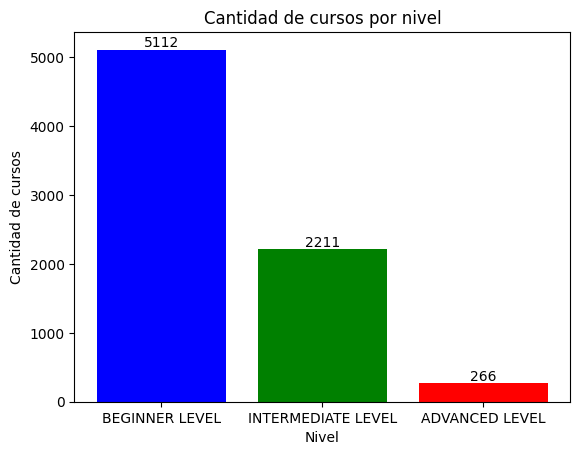

In [19]:
#importamos numpy para poder hacer los graficos	
import numpy as np
# Se importa matplotlib para poder hacer los graficos
import matplotlib.pyplot as plt
# Se obtiene la cantidad de cursos por nivel
cantidad_cursos_por_nivel = data['Level'].value_counts()

# Se obtiene los niveles
niveles = cantidad_cursos_por_nivel.index

# Se obtiene la cantidad de cursos
cantidad_cursos = cantidad_cursos_por_nivel.values

# Se obtiene el indice de los niveles
indice = np.arange(len(niveles))

# Se definen colores para cada nivel
colores = ['blue', 'green', 'red']

# Se crea el grafico con barras y se asigna un color a cada barra
plt.bar(indice, cantidad_cursos, color=colores)

# Se ajustan las etiquetas del eje x para mostrar los niveles
plt.xticks(indice, niveles, rotation=0)

# Agrega las cantidades encima de las barras
for i, cantidad in enumerate(cantidad_cursos):
    plt.text(i, cantidad + 0.1, str(cantidad), ha='center', va='bottom')

#Agregando propiedades a la gráfica
plt.title('Cantidad de cursos por nivel')
plt.xlabel('Nivel')
plt.ylabel('Cantidad de cursos')

# Se muestra la gráfica
plt.show()


#### **GRÁFICO 2**: Gráfica de barras horizontal del número de cursos en las principales categorías.

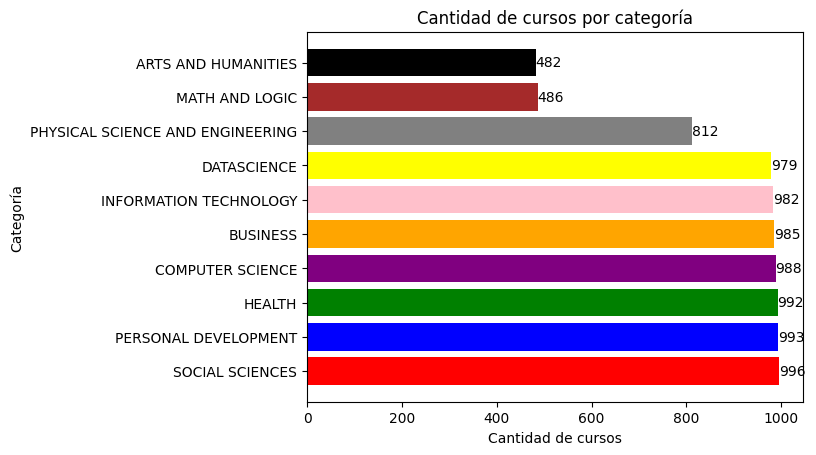

In [20]:
# Se obtiene la cantidad de cursos por categoría
categorias = data['Keyword'].value_counts().index
num_cursos_categoria = data['Keyword'].value_counts()

# color de las barras
colores = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'yellow', 'gray', 'brown', 'black']

# Se crea la gráfica de barras horizontal
plt.barh(categorias, num_cursos_categoria, color=colores)

# Agrega el texto con la cantidad de cursos al lado de cada barra
for i, num_cursos in enumerate(num_cursos_categoria):
    plt.text(num_cursos, i, str(num_cursos), ha='left', va='center')

# Propiedades de la gráfica
plt.title('Cantidad de cursos por categoría')
plt.xlabel('Cantidad de cursos')
plt.ylabel('Categoría')

# Se muestra la gráfica
plt.show()

#### **GRÁFICO 3**: Grafico de dispersión de la relación entre la duración el curso y el número de revisiones.

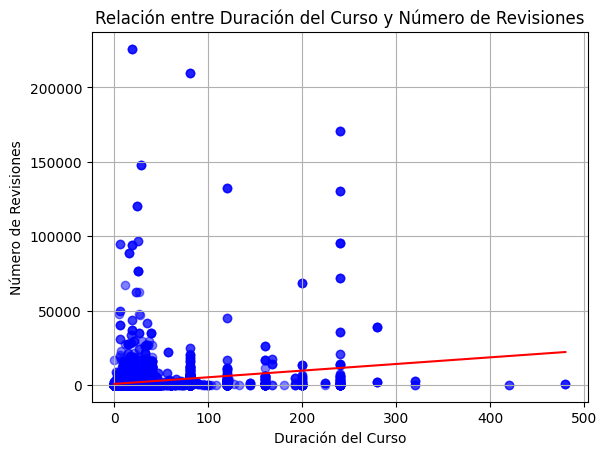

In [21]:
# Se obtiene las cantidades
duracion = data['Duration']
revisiones = data['Review']

# Calcula la pendiente y la intersección de la línea de tendencia (regresión lineal)
pendiente, interseccion = np.polyfit(duracion, revisiones, 1)

# Calcula los valores de la línea de tendencia
x_vals = np.array([min(duracion), max(duracion)])
y_vals = pendiente * x_vals + interseccion

# Calcula el coeficiente de correlación
coef_corr = np.corrcoef(duracion, revisiones)[0, 1]

# Crea el gráfico de dispersión
plt.scatter(duracion, revisiones, color='blue', alpha=0.5)

# Agrega la línea de tendencia
plt.plot(x_vals, y_vals, color='red')

# Propiedades del gráfico
plt.title('Relación entre Duración del Curso y Número de Revisiones')
plt.xlabel('Duración del Curso')
plt.ylabel('Número de Revisiones')

# Agregando cuadrícula
plt.grid(True)

# Muestra el gráfico
plt.show()

#### **GRÁFICO 4**: Histograma de la distribución de las duraciones de los cursos.

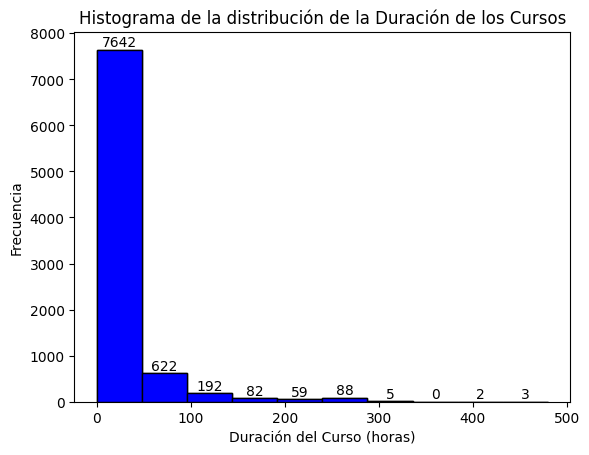

In [22]:
# Se obtienen los datos
duracion = data['Duration']

# Crea el histograma
frecuencia, bins, _ = plt.hist(duracion, color='blue', edgecolor='black')
plt.hist(duracion, color='blue',edgecolor='black')

# Propiedades del gráfico
plt.title('Histograma de la distribución de la Duración de los Cursos')
plt.xlabel('Duración del Curso (horas)')
plt.ylabel('Frecuencia')

for i in range(len(frecuencia)):
    x_pos = (bins[i] + bins[i+1]) / 2
    plt.text(x_pos, frecuencia[i], str(int(frecuencia[i])), ha='center', va='bottom', fontsize=10)

# Muestra el gráfico
plt.show()

#### **GRÁFICO 5**: Gráfico de cajas para visualizar la distribución de las calificaciones de los cursos por nivel de dificultad.

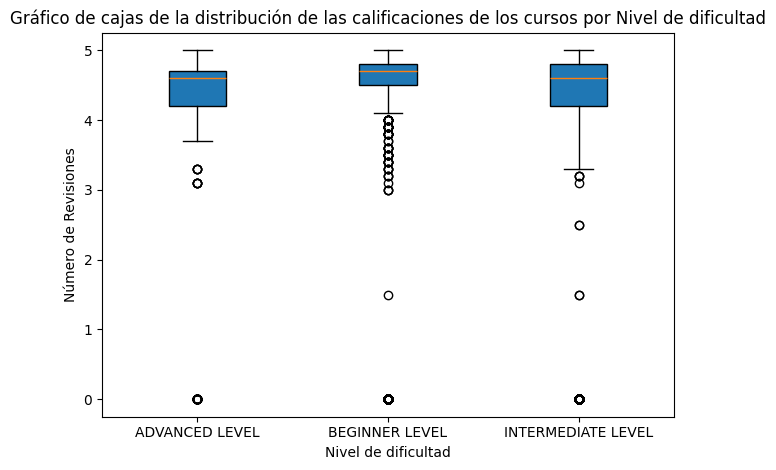

In [23]:

# Agrupa los datos por nivel de dificultad
grouped_data = data.groupby('Level')['Rating'].apply(list)

# Crea el gráfico de cajas
plt.boxplot(grouped_data.values, labels=grouped_data.index, patch_artist=True)

# Propiedades del gráfico
plt.title('Gráfico de cajas de la distribución de las calificaciones de los cursos por Nivel de dificultad')
plt.xlabel('Nivel de dificultad')
plt.ylabel('Número de Revisiones')

# Muestra el gráfico
plt.tight_layout()
plt.show()